<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Potato_leaf_model_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install tensorflow-addons

In [ ]:
# ✅ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ Define your data directory path
data_dir = '/content/drive/My Drive/Potato'

# ✅ Check if the data directory exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Directory '{data_dir}' does not exist.")

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from PIL import UnidentifiedImageError
import random

# ✅ Set your data directory
data_dir = '/content/drive/My Drive/Potato'

# ✅ Get class names from folder names
classes = [cls for cls in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, cls))]
label_map = {cls: idx for idx, cls in enumerate(classes)}

# ✅ Define CNN model
def build_compile_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(8, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(16, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ✅ Target count
TARGET_COUNT = 1000

# ✅ Load and balance data
X, y = [], []
augmentor = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

for cls in classes:
    cls_dir = os.path.join(data_dir, cls)
    images = os.listdir(cls_dir)
    img_arrays = []

    for img_file in images:
        try:
            img_path = os.path.join(cls_dir, img_file)
            img = load_img(img_path, target_size=(128, 128))
            img_array = img_to_array(img)
            img_arrays.append(img_array)
        except (UnidentifiedImageError, Exception) as e:
            print(f"Skipping {img_file}: {e}")

    img_arrays = np.array(img_arrays)

    if len(img_arrays) > TARGET_COUNT:
        # Trim
        img_arrays = img_arrays[:TARGET_COUNT]
    elif len(img_arrays) < TARGET_COUNT:
        # Augment
        extra_needed = TARGET_COUNT - len(img_arrays)
        gen = augmentor.flow(img_arrays, batch_size=32, shuffle=True)
        augmented = []
        while len(augmented) < extra_needed:
            batch = next(gen)
            augmented.extend(batch)
        augmented = np.array(augmented[:extra_needed])
        img_arrays = np.concatenate((img_arrays, augmented), axis=0)

    labels = [label_map[cls]] * TARGET_COUNT
    X.extend(img_arrays)
    y.extend(labels)

# ✅ Convert and normalize
X = np.array(X).astype('float32') / 255.0
y = np.array(y).astype('int')

# ✅ Show final distribution
print("\n✅ Final balanced class counts:")
final_df = pd.Series(y).map({v: k for k, v in label_map.items()}).value_counts()
print(final_df)

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23)

# ✅ Build & train model
model = build_compile_model(input_shape=(128, 128, 3), num_classes=len(classes))
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

# ✅ Evaluate
y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_test_pred = np.argmax(model.predict(X_test), axis=1)


✅ Final balanced class counts:
Early_blight    1000
Healthy         1000
Late_blight     1000
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.4997 - loss: 0.9682 - val_accuracy: 0.7111 - val_loss: 0.5913
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8152 - loss: 0.4512 - val_accuracy: 0.7733 - val_loss: 0.4399
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8803 - loss: 0.2930 - val_accuracy: 0.8844 - val_loss: 0.2818
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9071 - loss: 0.2413 - val_accuracy: 0.9167 - val_loss: 0.2141
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9462 - loss: 0.1576 - val_accuracy: 0.8444 - val_loss: 0.3985
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9468 - loss: 0.1592 - val_accuracy: 0.9333 - val_loss: 0.1670
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9356 - loss: 0.1626 - val_accuracy: 0.9700 - val_loss: 0.0910
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9820 - loss: 0.0617 - val_accuracy: 0.9556 - v

**Computed Results**

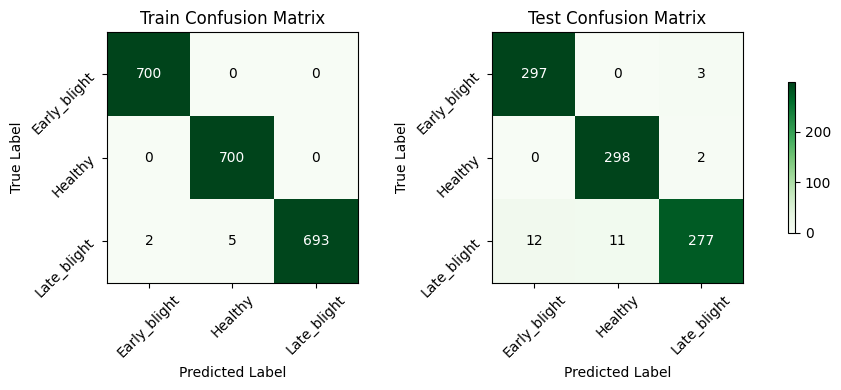

In [ ]:
# 📊 Confusion Matrices as Subplots
def plot_confusion_matrices(train_cm, test_cm, classes, save_path='confusion_matrices.png'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    for ax, cm, title in zip(axes, [train_cm, test_cm], ['Train Confusion Matrix', 'Test Confusion Matrix']):
        im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
        ax.set_title(title)
        tick_marks = np.arange(len(classes))
        ax.set_xticks(tick_marks)
        ax.set_yticks(tick_marks)
        ax.set_xticklabels(classes, rotation=45)
        ax.set_yticklabels(classes, rotation=45)

        fmt = 'd'
        thresh = cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
        ax.set_ylabel('True Label')
        ax.set_xlabel('Predicted Label')

    plt.tight_layout()
    fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
    plt.savefig(save_path)
    plt.show()

# Calculate and plot
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrices(cm_train, cm_test, classes)


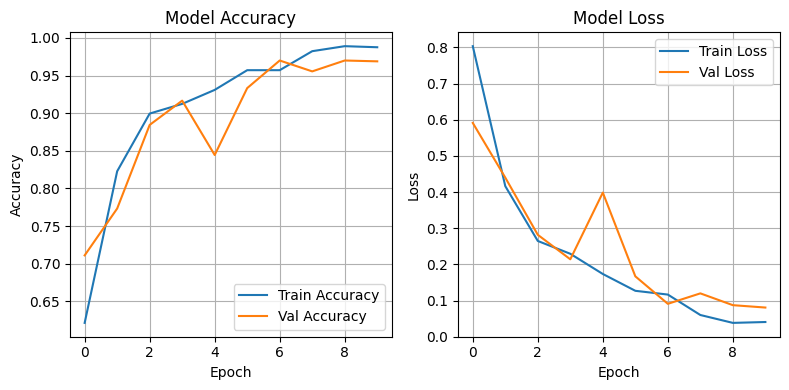

In [ ]:
# 2. 🧠 Save Smaller CNN Architecture Plot
plot_model(model, to_file="cnn_architecture.png", show_shapes=True, show_layer_names=True)

# 3. 📈 Save Convergence Curves
plt.figure(figsize=(8, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("convergence_curves.png")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Generate classification reports
train_report = classification_report(y_train, y_train_pred, target_names=classes, output_dict=True)
test_report = classification_report(y_test, y_test_pred, target_names=classes, output_dict=True)

# Create a summary dataframe for both training and testing
summary_metrics = {
    "Accuracy": [
        accuracy_score(y_train, y_train_pred),
        accuracy_score(y_test, y_test_pred)
    ],
    "Precision": [
        train_report["weighted avg"]["precision"],
        test_report["weighted avg"]["precision"]
    ],
    "Recall": [
        train_report["weighted avg"]["recall"],
        test_report["weighted avg"]["recall"]
    ],
    "F1-score": [
        train_report["weighted avg"]["f1-score"],
        test_report["weighted avg"]["f1-score"]
    ]
}

summary_df = pd.DataFrame(summary_metrics, index=["Training", "Testing"])
summary_df


,Accuracy,Precision,Recall,F1-score
Training,0.996667,0.996686,0.996667,0.996663
Testing,0.968889,0.969279,0.968889,0.968638
